In [2]:
import sys
from moviepy.editor import *
from scipy.io.wavfile import read
import numpy as np
from matplotlib import pyplot as plt
import json

class AudioChannel(object):
    def __init__(self, video_file_name, audio_file_name):
        super(AudioChannel, self).__init__()
        self.video_file_name = video_file_name
        self.audio_file_name = audio_file_name
        self.audio = read(audio_file_name)[1]

In [3]:
awais = AudioChannel("data/awais_trimmed.mp4", "data/awais.wav")
george = AudioChannel("data/george_trimmed_2.mp4", "data/george.wav")

In [4]:
def amplitude(arr):
    return np.sqrt(np.mean(np.array(arr)**2))

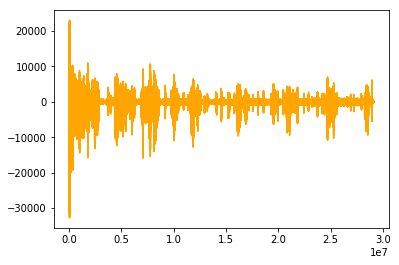

In [6]:
# plt.plot(george.audio)
plt.plot(awais.audio, color="orange")
plt.show()

In [4]:
SAMPLE_RATE = 44100
CHUNK_SIZE = 1024
BIAS_HYSTERESIS = 10
MIN_LENGTH = 4
MULTIPLIER = 160

In [5]:
def amplitude(arr):
    return np.sqrt(np.mean(np.square(np.array(arr, dtype="int32"))))

def chunked_amplitude(audio):
    output = []
    for i in range(0, len(audio) - CHUNK_SIZE, CHUNK_SIZE):
        output.append(amplitude(audio[i : i + CHUNK_SIZE]))
    
    return output

def long_amplitude(audio):
    return np.mean(chunked_amplitude(audio))

In [7]:
long_amplitude(awais.audio)

330.98431565230015

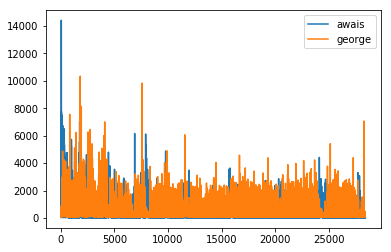

In [8]:
plt.plot(chunked_amplitude(awais.audio), label="awais")
plt.plot(chunked_amplitude(george.audio), label="george")
plt.legend()
plt.show()

In [6]:
def update_progress(progress):
    progress_int = int(progress)
    sys.stdout.write('\r[{0}] {1}%'.format('#'*(int(progress_int/10)), progress_int))

def generate_cuts(person_a, person_b):
    output = []
    currently_showing = person_a if long_amplitude(person_a.audio[0:(MULTIPLIER*CHUNK_SIZE)]) > long_amplitude(person_b.audio[0:(MULTIPLIER*CHUNK_SIZE)]) else person_b
    not_showing = person_b if currently_showing == person_a else person_a
    prev_time_out = 0.0
        
    for i in np.arange(0, len(person_a.audio) - (CHUNK_SIZE * MULTIPLIER), CHUNK_SIZE):
        if (i % 10000 == 0):
            update_progress(i / (len(person_a.audio) - (CHUNK_SIZE * MULTIPLIER)) * 100)

        time_out = i / SAMPLE_RATE

        other_person_is_speaking = amplitude(not_showing.audio[i:i+CHUNK_SIZE]) > amplitude(currently_showing.audio[i:i+CHUNK_SIZE])
        other_person_will_be_speaking = long_amplitude(not_showing.audio[i:i+(MULTIPLIER*CHUNK_SIZE)]) > long_amplitude(currently_showing.audio[i:i+(MULTIPLIER*CHUNK_SIZE)])
        should_switch = other_person_is_speaking and other_person_will_be_speaking and ((time_out - prev_time_out) > MIN_LENGTH)

        if should_switch:            
            output.append({'cut_to': currently_showing.video_file_name, 'time_in': prev_time_out, 'time_out': time_out})
            prev_time_out = i / SAMPLE_RATE
            
            temp = currently_showing
            currently_showing = not_showing
            not_showing = temp
            
    output.append({'cut_to': currently_showing.video_file_name, 'time_in': prev_time_out, 'time_out': len(person_a.audio) / SAMPLE_RATE})    
    
    return output

In [7]:
cuts = generate_cuts(awais, george)

[#########] 99%

NameError: name 'json' is not defined

In [10]:
cuts

[{'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 0.0,
  'time_out': 12.399455782312925},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 12.399455782312925,
  'time_out': 19.342222222222222},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 19.342222222222222,
  'time_out': 26.958367346938775},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 26.958367346938775,
  'time_out': 38.591564625850339},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 38.591564625850339,
  'time_out': 42.608616780045352},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 42.608616780045352,
  'time_out': 53.939954648526076},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 53.939954648526076,
  'time_out': 60.743401360544219},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 60.743401360544219,
  'time_out': 98.800907029478452},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 98.800907029478452,
  'time_out': 106.74213151927438},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_

In [9]:
with open('cuts.json', 'w') as outfile:
    json.dump(cuts, outfile)

In [46]:
def avg_cut_length(cuts):
    durations = []
    for cut in cuts:
        durations.append(cut['time_out'] - cut['time_in'])
    return np.mean(durations)

avg_cut_length(cuts)

17.37012591001313

In [47]:
len(cuts)

38

In [48]:
cuts

[{'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 0.0,
  'time_out': 12.399455782312925},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 12.399455782312925,
  'time_out': 19.342222222222222},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 19.342222222222222,
  'time_out': 26.958367346938775},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 26.958367346938775,
  'time_out': 38.591564625850339},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 38.591564625850339,
  'time_out': 42.608616780045352},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 42.608616780045352,
  'time_out': 53.939954648526076},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 53.939954648526076,
  'time_out': 60.743401360544219},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_in': 60.743401360544219,
  'time_out': 98.800907029478452},
 {'cut_to': 'data/awais_trimmed.mp4',
  'time_in': 98.800907029478452,
  'time_out': 106.74213151927438},
 {'cut_to': 'data/george_trimmed_2.mp4',
  'time_

In [49]:
clips = []

duration = 638
def build_clips(cuts):
    for i, cut in enumerate(cuts):
        print(i)
#         print(cut)
        if cut["time_out"] < duration:
            clips.append(VideoFileClip(cut["cut_to"]).subclip(cut["time_in"], min(cut["time_out"], duration)))
    print("Clips built")
    
build_clips(cuts)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
Clips built


In [36]:
len(clips)

35

In [50]:
clips

In [51]:
result = concatenate_videoclips(clips)
result.write_videofile("data/output_4.mp4", verbose=True, codec="libx264") # Many options...

[MoviePy] >>>> Building video data/output_4.mp4
[MoviePy] Writing audio in output_4TEMP_MPY_wvf_snd.mp3



100%|██████████| 12678/12678 [00:13<00:00, 944.16it/s] 

[MoviePy] Done.
[MoviePy] Writing video data/output_4.mp4



100%|██████████| 14374/14374 [07:16<00:00, 32.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: data/output_4.mp4 

